In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
from citipy import citipy
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-30.36172173450978 138.49274777878009
67.66110786769704 -58.55655465780521
-21.727894653535373 35.950504386195405
11.006317523811106 -16.2241170226373
14.699231515133732 167.96012753647244
-79.98427789838478 1.328642376768272
22.279100432986255 -12.355963807085033
19.827167343819937 -122.44381496818102
-28.920136946380367 37.30071518604106
36.3115336994868 -164.14224912257436
0.0955594335603962 -24.667443227368267
-42.1367451542787 36.935592048047
44.47673511761997 -17.325476226986268
60.80984007954507 -47.98081917922204
70.29911620457244 -44.061879975235684
29.370591500450004 -179.16928317546464
-61.55332132167486 171.8351461913133
66.54419778060134 -119.79137513136126
-13.963133027785219 -121.4008725930126
-53.475627389706574 25.331200977847715
-55.0813382458518 -171.91473347069373
88.76866250523588 93.88161777178698
48.659844087744034 -13.117700429468783
-88.16887794629379 -92.6273829244036
26.34021863741505 -111.78770393698343
57.38278517382574 -164.14758164483231
14.11416388286625

24.554206148445104 -21.032861709367808
-43.29642346861686 99.78159559942668
-74.59355584760053 -14.169531475028293
-1.5698144222494506 148.1745519004014
54.564938022245315 -172.80677825992615
13.829324726608675 33.56483010970675
39.74732408594329 -83.40067289464893
84.3096353244895 23.101412660761753
-59.95303151509465 -86.54674582923776
-3.152738332366127 -20.566522498630206
73.89356881585528 -41.142106918218076
-38.449958711378514 -165.15042797197583
80.5545940880109 21.734638411593977
40.143046224578455 16.10755227563854
-70.05852399638415 152.75531021608867
37.49058031599456 138.30036036838692
65.33504543993513 -136.74638189147362
47.961979006128445 -102.08335160500086
-21.14349383421694 169.14999758721103
33.08081163648389 -166.07079203344358
73.81656039402051 144.88000550354002
-50.794391111674315 -168.04690948001866
-41.069568727460414 -67.30586292606637
-4.649494788125409 100.61779967060585
82.84924992828095 -147.4188067712804
-36.12567905914053 36.90874334759155
-76.2874541442

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port augusta
Processing Record 2 of Set 1 | sisimiut
Processing Record 3 of Set 1 | beira
Processing Record 4 of Set 1 | bubaque
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | atar
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | richards bay
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | touros
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | muros
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | dingle
Processing Record 23 of Set 1 | punta arenas


Processing Record 41 of Set 4 | ewo
Processing Record 42 of Set 4 | tarauaca
Processing Record 43 of Set 4 | iralaya
Processing Record 44 of Set 4 | senanga
Processing Record 45 of Set 4 | mmathubudukwane
Processing Record 46 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 47 of Set 4 | kasongo
Processing Record 48 of Set 4 | valdivia
Processing Record 49 of Set 4 | general roca
Processing Record 50 of Set 4 | rocha
Processing Record 1 of Set 5 | prince george
Processing Record 2 of Set 5 | abalak
Processing Record 3 of Set 5 | japura
Processing Record 4 of Set 5 | mahdalynivka
Processing Record 5 of Set 5 | banda aceh
Processing Record 6 of Set 5 | panjab
Processing Record 7 of Set 5 | ust-charyshskaya pristan
Processing Record 8 of Set 5 | amga
Processing Record 9 of Set 5 | taoudenni
Processing Record 10 of Set 5 | pevek
Processing Record 11 of Set 5 | parainen
Processing Record 12 of Set 5 | marrakesh
Processing Record 13 of Set 5 | nador
Processing Record 14 of 

Processing Record 30 of Set 8 | shenjiamen
Processing Record 31 of Set 8 | claveria
Processing Record 32 of Set 8 | gat
Processing Record 33 of Set 8 | rusape
Processing Record 34 of Set 8 | fortuna
Processing Record 35 of Set 8 | izumo
Processing Record 36 of Set 8 | santiago del estero
Processing Record 37 of Set 8 | harper
Processing Record 38 of Set 8 | suamico
Processing Record 39 of Set 8 | ribeira grande
Processing Record 40 of Set 8 | talah
City not found. Skipping...
Processing Record 41 of Set 8 | carndonagh
Processing Record 42 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 43 of Set 8 | warmbad
Processing Record 44 of Set 8 | codrington
Processing Record 45 of Set 8 | dujuma
City not found. Skipping...
Processing Record 46 of Set 8 | bejucal
Processing Record 47 of Set 8 | guatire
Processing Record 48 of Set 8 | rio grande
Processing Record 49 of Set 8 | umm lajj
Processing Record 50 of Set 8 | farah
Processing Record 1 of Set 9 | samusu
City not found.

Processing Record 14 of Set 12 | korla
Processing Record 15 of Set 12 | waipawa
Processing Record 16 of Set 12 | paracuru
Processing Record 17 of Set 12 | dubenskiy
City not found. Skipping...
Processing Record 18 of Set 12 | puerto penasco
Processing Record 19 of Set 12 | kuching
Processing Record 20 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 12 | brae
Processing Record 22 of Set 12 | abu zabad
Processing Record 23 of Set 12 | north platte
Processing Record 24 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 25 of Set 12 | vazante
Processing Record 26 of Set 12 | bar harbor
Processing Record 27 of Set 12 | pithoro
Processing Record 28 of Set 12 | atasu
Processing Record 29 of Set 12 | susanville
Processing Record 30 of Set 12 | namatanai
Processing Record 31 of Set 12 | atherton
Processing Record 32 of Set 12 | kodinsk
Processing Record 33 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 34 of S

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Augusta,-32.5000,137.7667,54.23,76,100,16.75,AU,2022-09-15 21:25:19
1,Sisimiut,66.9395,-53.6735,42.98,97,100,3.96,GL,2022-09-15 21:26:06
2,Beira,-19.8436,34.8389,64.49,94,0,5.75,MZ,2022-09-15 21:26:06
3,Bubaque,11.2833,-15.8333,80.74,85,32,16.13,GW,2022-09-15 21:26:06
4,Butaritari,3.0707,172.7902,81.93,72,12,15.50,KI,2022-09-15 21:26:07
5,Hermanus,-34.4187,19.2345,57.79,87,59,1.12,ZA,2022-09-15 21:26:07
6,Atar,20.5169,-13.0499,97.97,18,6,8.59,MR,2022-09-15 21:26:08
7,Guerrero Negro,27.9769,-114.0611,75.13,64,1,18.52,MX,2022-09-15 21:26:08
8,Richards Bay,-28.7830,32.0377,68.97,72,3,10.69,ZA,2022-09-15 21:26:08
9,Kapaa,22.0752,-159.3190,84.11,67,0,9.22,US,2022-09-15 21:26:09


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Augusta,AU,2022-09-15 21:25:19,-32.5000,137.7667,54.23,76,100,16.75
1,Sisimiut,GL,2022-09-15 21:26:06,66.9395,-53.6735,42.98,97,100,3.96
2,Beira,MZ,2022-09-15 21:26:06,-19.8436,34.8389,64.49,94,0,5.75
3,Bubaque,GW,2022-09-15 21:26:06,11.2833,-15.8333,80.74,85,32,16.13
4,Butaritari,KI,2022-09-15 21:26:07,3.0707,172.7902,81.93,72,12,15.50
5,Hermanus,ZA,2022-09-15 21:26:07,-34.4187,19.2345,57.79,87,59,1.12
6,Atar,MR,2022-09-15 21:26:08,20.5169,-13.0499,97.97,18,6,8.59
7,Guerrero Negro,MX,2022-09-15 21:26:08,27.9769,-114.0611,75.13,64,1,18.52
8,Richards Bay,ZA,2022-09-15 21:26:08,-28.7830,32.0377,68.97,72,3,10.69
9,Kapaa,US,2022-09-15 21:26:09,22.0752,-159.3190,84.11,67,0,9.22


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1663278098.970214

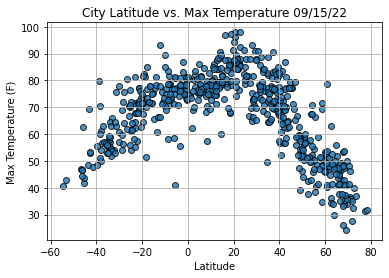

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

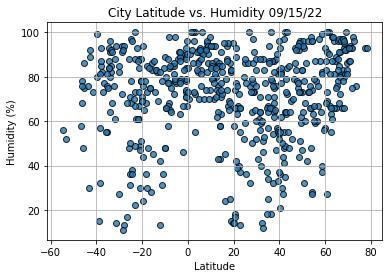

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

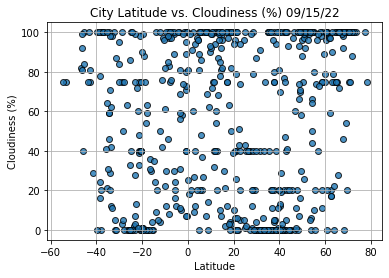

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

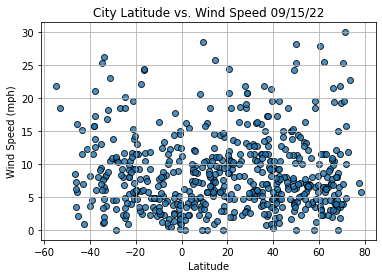

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()